In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import seaborn as sns

In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


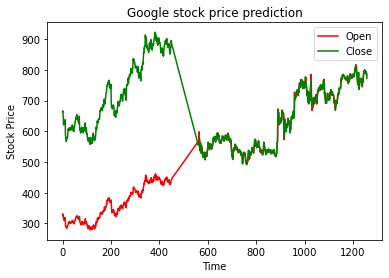

In [27]:
plt.plot(data['Open'], color = 'red', label = 'Open')
plt.plot(data['Close'], color = 'green', label = 'Close')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [10]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [12]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [13]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [15]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [16]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 24s - loss: 0.0457 - 24s/epoch - 679ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0111 - 8s/epoch - 220ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0105 - 7s/epoch - 210ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0095 - 7s/epoch - 186ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0085 - 7s/epoch - 209ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0081 - 7s/epoch - 193ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0080 - 7s/epoch - 192ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 190ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0069 - 5s/epoch - 154ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0064 - 6s/epoch - 178ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 210ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0061 - 8s/epoch - 216ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0058 - 6s/epoch - 182ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 195ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 191ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0061 - 7s/epoch - 199ms/step
Epoch 17/20
35/

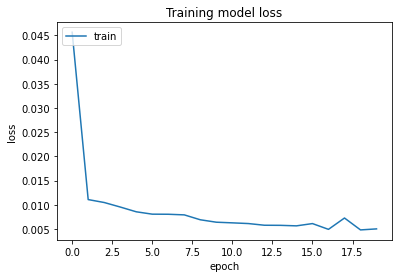

In [17]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [18]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([[1.0692806 ],
       [1.0739379 ],
       [1.0856999 ],
       [1.1031642 ],
       [1.1193261 ],
       [1.1246924 ],
       [1.1172653 ],
       [1.1022116 ],
       [1.089205  ],
       [1.0823927 ],
       [1.0744976 ],
       [1.0637953 ],
       [1.053688  ],
       [1.044318  ],
       [1.0407014 ],
       [1.0434108 ],
       [1.0582063 ],
       [1.0839939 ],
       [1.1159954 ],
       [1.1496812 ],
       [1.1690153 ],
       [1.1723201 ],
       [1.1575608 ],
       [1.1306645 ],
       [1.101987  ],
       [1.0808067 ],
       [1.0702288 ],
       [1.0656432 ],
       [1.0588796 ],
       [1.049851  ],
       [1.0395982 ],
       [1.0277095 ],
       [1.0103498 ],
       [0.98823833],
       [0.9759125 ],
       [0.980083  ],
       [0.99785626],
       [1.0222343 ],
       [1.0481203 ],
       [1.0657369 ],
       [1.0813142 ],
       [1.09729   ],
       [1.1143806 ],
       [1.1303904 ],
       [1.1419843 ],
       [1.1451125 ],
       [1.1374991 ],
       [1.127

In [20]:
predicted_price = sc.inverse_transform(y_pred)

In [22]:
predicted_price

array([[ 952.0172 ],
       [ 954.0243 ],
       [ 959.0932 ],
       [ 966.6197 ],
       [ 973.5848 ],
       [ 975.89746],
       [ 972.69666],
       [ 966.2091 ],
       [ 960.6038 ],
       [ 957.66797],
       [ 954.26544],
       [ 949.65326],
       [ 945.2974 ],
       [ 941.2593 ],
       [ 939.7007 ],
       [ 940.86835],
       [ 947.2446 ],
       [ 958.35803],
       [ 972.1494 ],
       [ 986.66656],
       [ 994.9988 ],
       [ 996.4231 ],
       [ 990.06244],
       [ 978.4711 ],
       [ 966.1123 ],
       [ 956.9845 ],
       [ 952.42584],
       [ 950.4496 ],
       [ 947.5348 ],
       [ 943.6438 ],
       [ 939.2253 ],
       [ 934.1017 ],
       [ 926.62036],
       [ 917.0912 ],
       [ 911.7793 ],
       [ 913.5766 ],
       [ 921.2361 ],
       [ 931.74207],
       [ 942.89795],
       [ 950.4899 ],
       [ 957.2031 ],
       [ 964.08813],
       [ 971.4535 ],
       [ 978.3531 ],
       [ 983.34955],
       [ 984.6977 ],
       [ 981.4166 ],
       [ 977.

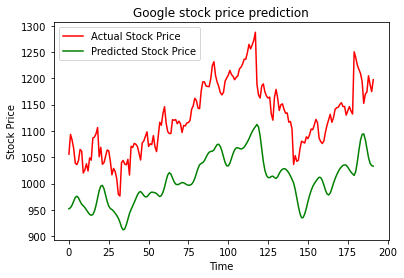

In [23]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()